In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import csiborgtools
import utils
%load_ext autoreload
%autoreload 2

import joblib
from os.path import join
from glob import glob

In [53]:
from astropy.cosmology import FlatLambdaCDM

In [54]:
cosmo = FlatLambdaCDM(H0=70.5, Om0=0.307, Tcmb0=2.728)

In [60]:
x = cosmo.Om0 - 1

18*np.pi**2 + 82 * x - 39 * x**2

102.09716821960843

In [2]:
Nsim = 9844
simpath = csiborgtools.io.get_sim_path(Nsim)
Nsnap = 1016

In [40]:
fname = join(utils.dumpdir, "ramses_out_{}_{}.npy".format(str(Nsim).zfill(5), str(Nsnap).zfill(5)))

In [41]:
data = np.load(fname)

<IPython.core.display.Javascript object>


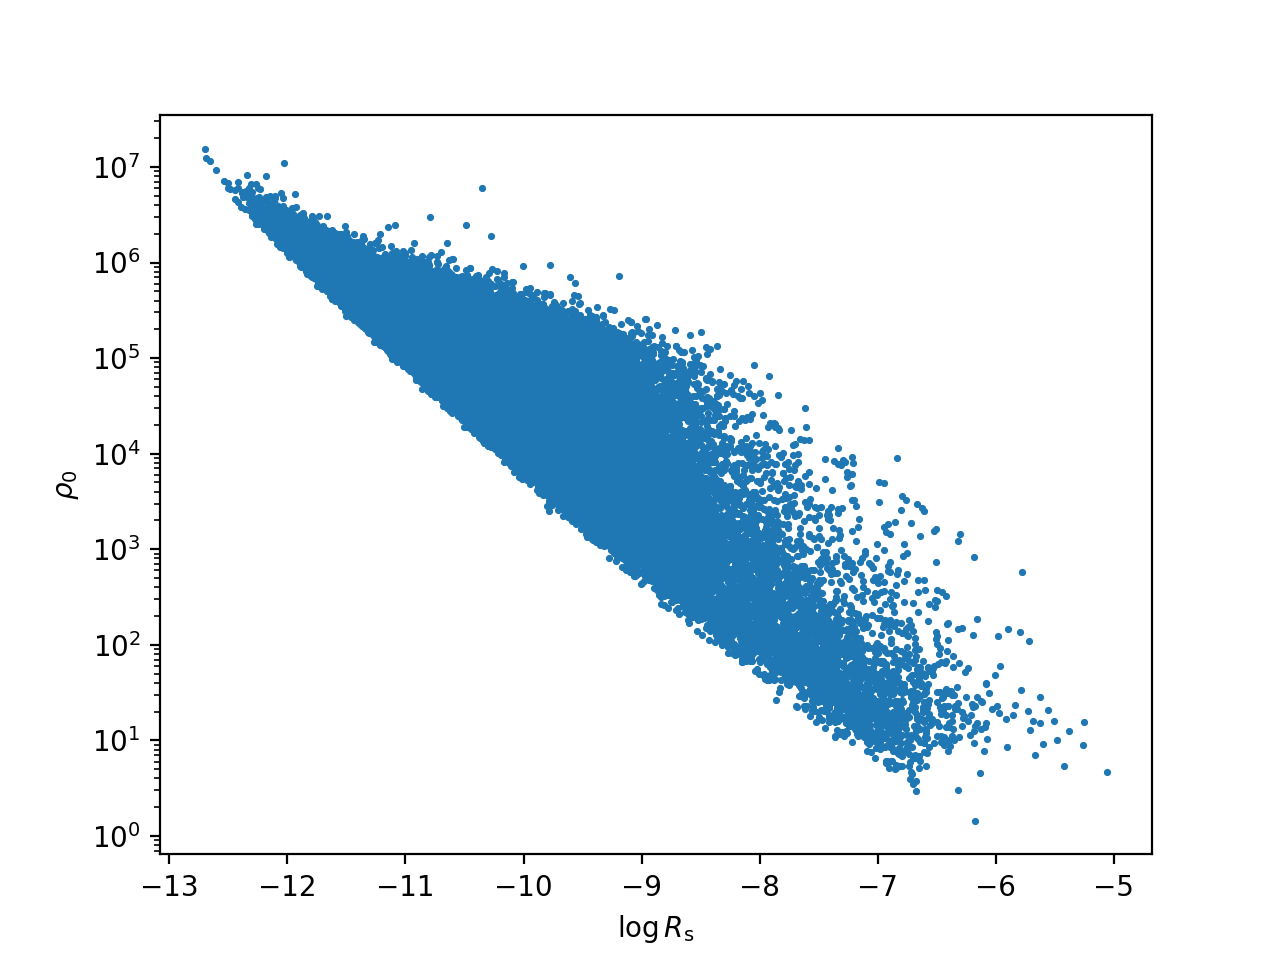

In [49]:
plt.figure()
plt.scatter(data["logRs"], data["rho0"], s=2.5, rasterized=True)
plt.yscale("log")

plt.ylabel(r"$\rho_0$")
plt.xlabel(r"$\log R_{\rm s}$")
# plt.savefig("../plots/rho0.png", dpi=450)
plt.show()

In [44]:
data["rho0"]

array([287721.82008412, 249035.67807171,  69665.64384864, ...,
         2582.73496889,             nan,             nan])

In [24]:
out = csiborgtools.io.combine_splits(utils.Nsplits, Nsim, Nsnap, utils.dumpdir, )

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:24<00:00,  8.16it/s]


In [27]:
out.dtype.names

('index',
 'level',
 'parent',
 'ncell',
 'peak_x',
 'peak_y',
 'peak_z',
 'rho-',
 'rho+',
 'rho_av',
 'mass_cl',
 'relevance',
 'npart',
 'totpartmass',
 'logRs')

<IPython.core.display.Javascript object>


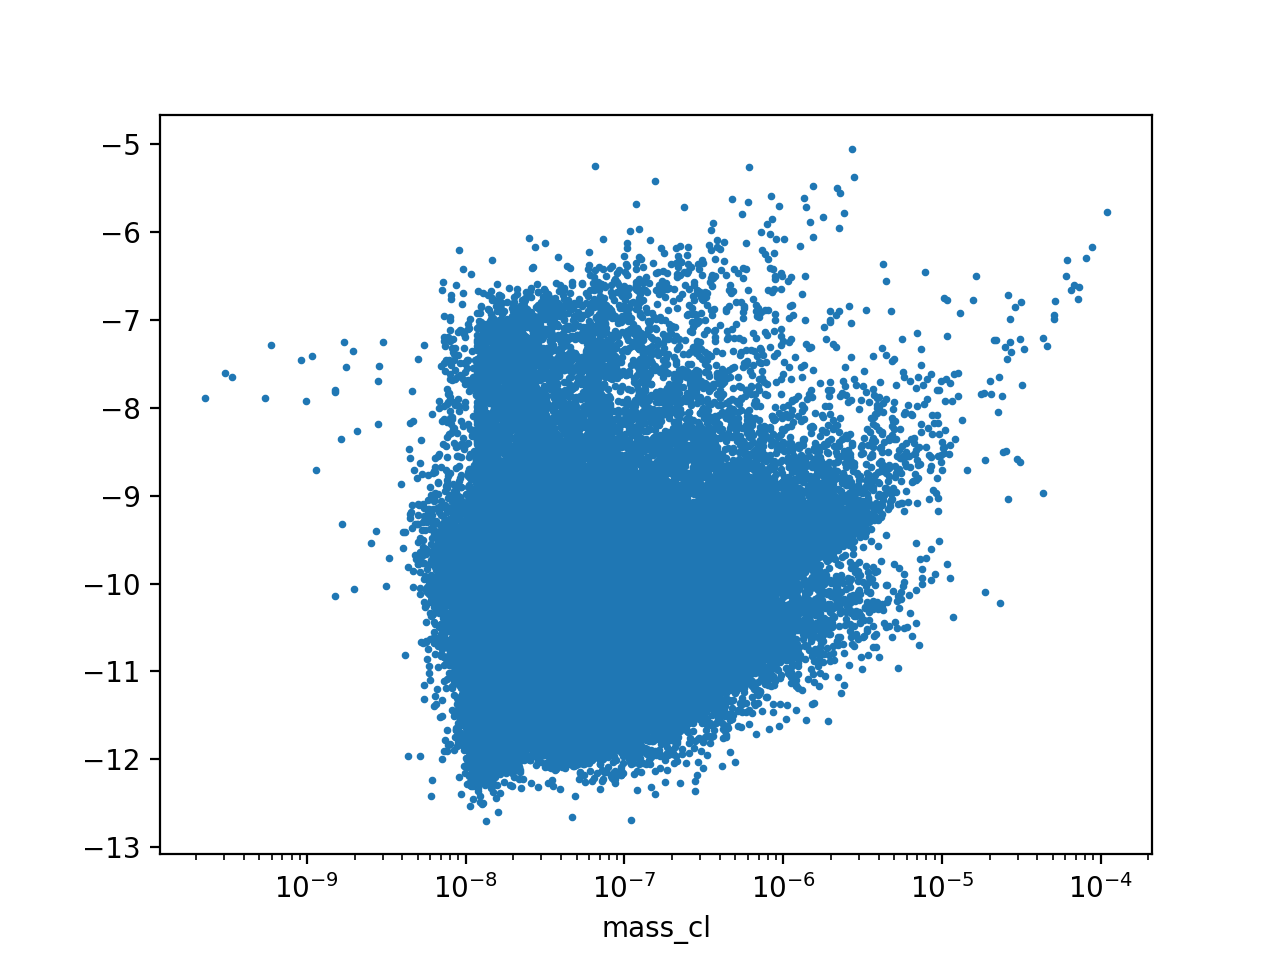

In [36]:
plt.figure()

plt.scatter(out["mass_cl"], out["logRs"], s=3, rasterized=True)
# t = np.logspace(-8, -4, 1000)
# plt.plot(t, t, c="red", ls="--")


# plt.yscale("log")
plt.xscale("log")
plt.xlabel("mass_cl")
# plt.ylabel("summed mass of all particles")

plt.savefig("../plots/mass.png", dpi=400)
plt.show()

In [22]:
mask = np.isin(out["index"], arr["index"])

In [23]:
mask

array([ True,  True,  True, ..., False, False, False])

In [ ]:
np.where()

array([       1,        2,        3, ..., 21795024, 21796985, 21797711])

In [ ]:
# clump_ids = csiborgtools.io.read_clumpid(Nsnap, simpath)
# clumps = csiborgtools.io.read_clumps(Nsnap, simpath, )

# particles = csiborgtools.io.read_particle(["x", "y", "z", "M", "level"], Nsnap, simpath)
# clump_ids, particles = csiborgtools.io.drop_zero_indx(clump_ids, particles)

# with_particles = csiborgtools.fits.clump_with_particles(clump_ids, clumps)
# clumps = clumps[with_particles]

In [ ]:
f = join(utils.dumpdir, "ramses_out_09844_01016_123.npy")
f = np.load(f)

In [ ]:
plt.figure()
plt.hist(f["logRs"], bins="auto")
plt.show()